### http://seaborn.pydata.org/tutorial/aesthetics.html

(seaborn figure styles link)

Seaborn color palettes: https://seaborn.pydata.org/tutorial/color_palettes.html  
Check out this great post too: https://medium.com/@morganjonesartist/color-guide-to-seaborn-palettes-da849406d44f

- SEQUENTIAL: e.g. different shades of same color.  Appropriate when data range from relatively low or uninteresting values to relatively high or interesting values (or vice versa)
- DIVERGING - highlight both low and high values

Seaborn is a library that builds on top of matplotlib.
- Intregrated with pandas
- High level interface to plot data
- Additional functionality, better defaults
- Less code than matplotlib 
- All of the functionality is accessible at the top level.

Cons?

In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pydataset import data

Seaborn API Reference  
https://seaborn.pydata.org/api.html#

### Different type of plots in Seaborn

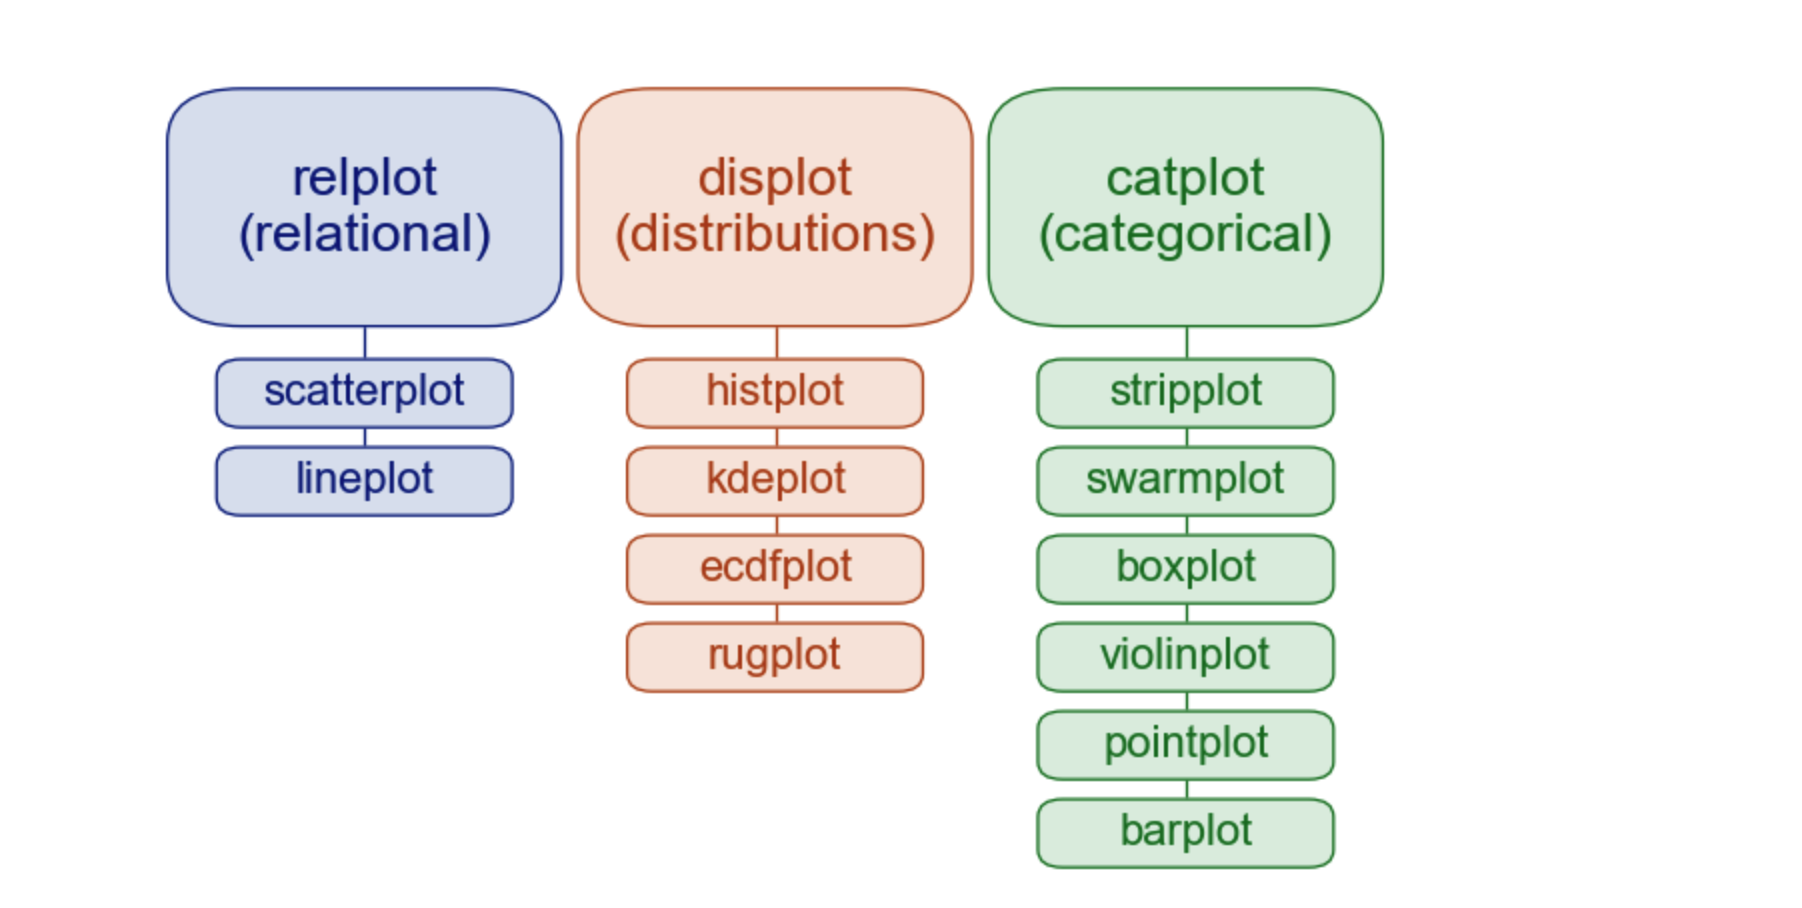

 - source: https://seaborn.pydata.org/tutorial/function_overview.html

In [10]:
# look for all datasets available in seaborn

print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'exercise', 'flights', 'fmri', 'gammas', 'geyser', 'iris', 'mpg', 'penguins', 'planets', 'taxis', 'tips', 'titanic']


In [12]:
# Option 1 : Load directly from sns dataset
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### In Seaborn you cannot see the documentation like you can in <b>pydatasets</b>

In [17]:
# Option 2: Load using pydataseta=
tips = data('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4


In [14]:
data('tips', show_doc = True)

tips

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Tipping data

### Description

One waiter recorded information about each tip he received over a period of a
few months working in one restaurant. He collected several variables:

### Usage

    data(tips)

### Format

A data frame with 244 rows and 7 variables

### Details

  * tip in dollars, 

  * bill in dollars, 

  * sex of the bill payer, 

  * whether there were smokers in the party, 

  * day of the week, 

  * time of day, 

  * size of the party. 

In all he recorded 244 tips. The data was reported in a collection of case
studies for business statistics (Bryant & Smith 1995).

### References

Bryant, P. G. and Smith, M (1995) _Practical Data Analysis: Case Studies in
Business Statistics_. Homewood, IL: Richard D. Irwin Publishing:




In [18]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4


In [19]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 1 to 244
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 15.2+ KB


#### Types of data:

- Continuous Data:- Numeric data with possibly infinite resolution
    - Height
    - Weight
    - total_bill and tip
    - temperature
- Categorical - Distinct categories
    - weekdays
    - Gender
    - 'smoker'
    - letter grades (A, B, C..)

- Discrete - Distinct numeric categories 
     - party_size - numeric but discete
     - number of customer complaints
     - number of flaws or defects.

### Relational Plots 

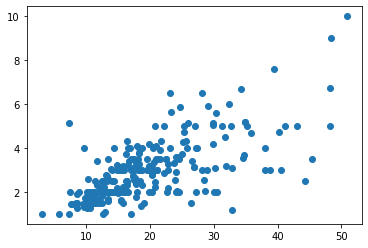

In [20]:
# scatterplot in matplotlib
    # relational
    # used with numeric, continuous variables

plt.scatter(tips.total_bill, tips.tip)

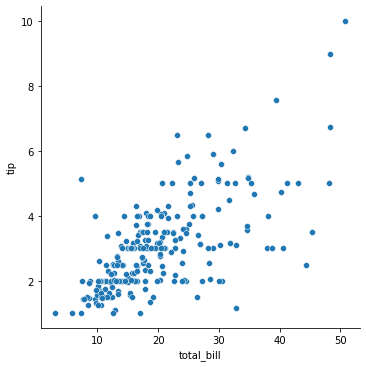

In [23]:
# Explore relationship between total_bill and tip using relplot

sns.relplot(data = tips, x = 'total_bill', y = 'tip')

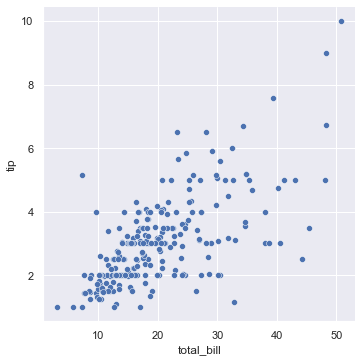

In [25]:
# Update defaults (rc params in matplotlib)


sns.set()  # Alias for sns.set_theme()
sns.relplot(data = tips, x = 'total_bill', y = 'tip')


### http://seaborn.pydata.org/tutorial/aesthetics.html

(seaborn figure styles link)

In [26]:
# same plot above, but with different sns defaults (set using sns.set())



### hue, size and style arguments

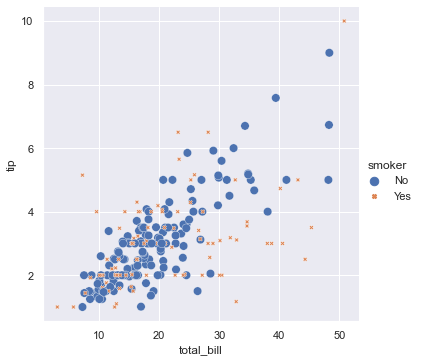

In [35]:
# visualize if relationship is different for smoker vs non-smoker (use hue argument)

# sns.relplot(data = tips, x = 'total_bill', y = 'tip')

sns.relplot(data = tips, x = 'total_bill', y = 'tip',
           hue = 'smoker',
           style = 'smoker',
           size = 'smoker')

## Lineplot: Relplot with 'kind' argument

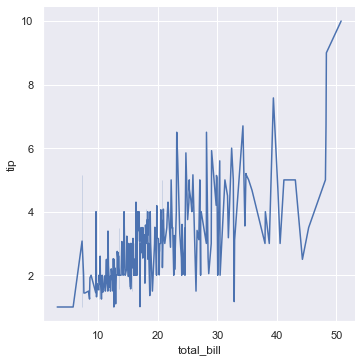

In [36]:
# lineplot for total bill vs tips - may not be appropriate in this case. Note use of 'kind' argument


sns.relplot(data = tips, x = 'total_bill', y = 'tip',
           kind = 'line')

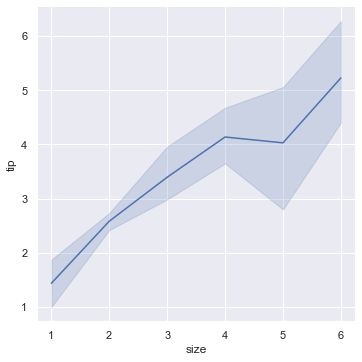

In [42]:
# lineplot for discrete values. The lineplot will use mean value at each size to draw a line 
# shaded region is 95% CI. Can be turned off with 'ci = None'

sns.relplot(data = tips, x = 'size', y = 'tip',
           kind = 'line', 
           estimator = 'mean')

https://en.wikipedia.org/wiki/Bootstrapping_(statistics)

### Small multiple (https://en.wikipedia.org/wiki/Small_multiple)
- similar graphs or charts using the same scale and axes
- easy to compare


- Main idea: Pick a categorical features and create a chart for each category

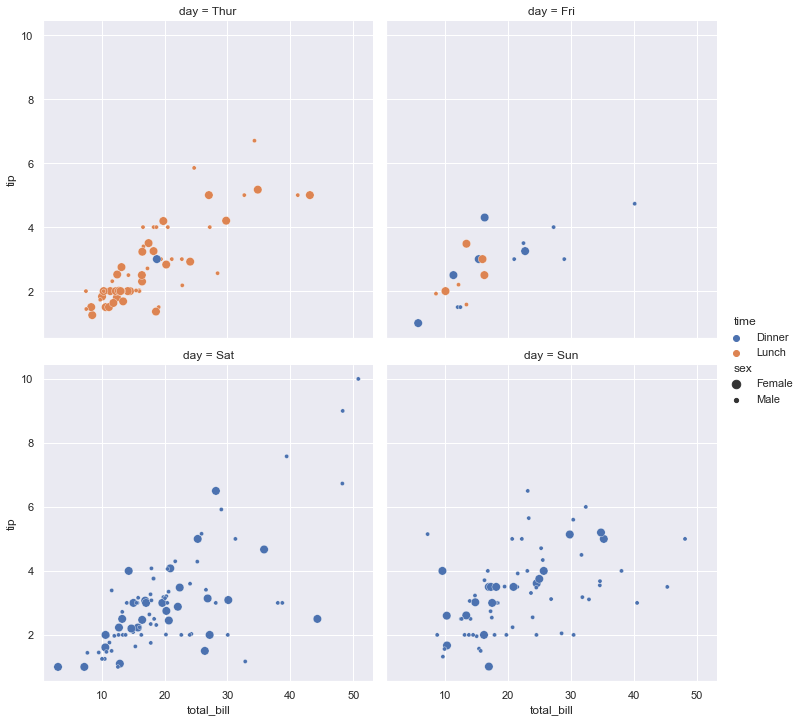

In [54]:
#  FacetGrid with 'col'

sns.relplot(data = tips, x = 'total_bill', y = 'tip', col = 'day',
           hue = 'time',
           size = 'sex',
           col_wrap = 2,
           col_order = ['Thur', 'Fri', 'Sat', 'Sun'])

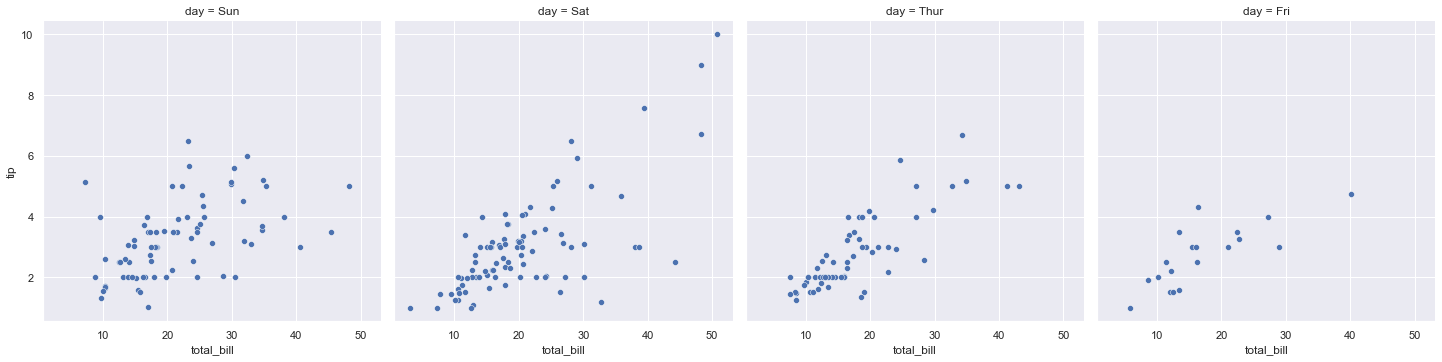

In [55]:
# Facetgrid with lineplot

sns.relplot(data = tips, x = 'total_bill', y = 'tip',
            col = 'day')

#### Key takeaways?
- Tip amount generally increases with total_bill
- Waiter works in evenings on Sun and sat
- Waiter works during lunchtime on Thursday


#### Ways to add DF columns to the chart (add new dimensions to the chart)

- hue
- col - creates subplots
- style


#### Using Scatterplot or lineplots instead of relplot
- Scatterplot: axes level object
- Relplot: figure level object

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

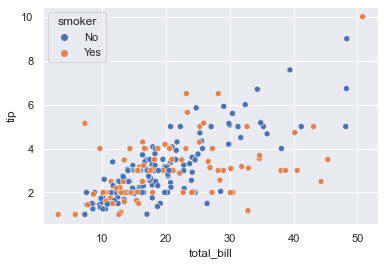

In [57]:
# scatterplot - returns an axes level object

sns.scatterplot(data = tips, x = 'total_bill', y = 'tip',
            hue = 'smoker')

## Distributions: displot

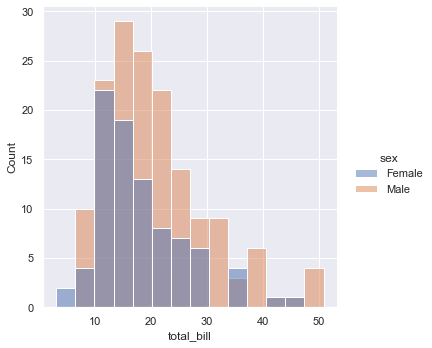

In [67]:
# displot for total_bill (hist, kde, rug)

sns.displot(data = tips, x = 'total_bill',
           hue = 'sex')#,
           #kde = True,
           #rug = True)

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4


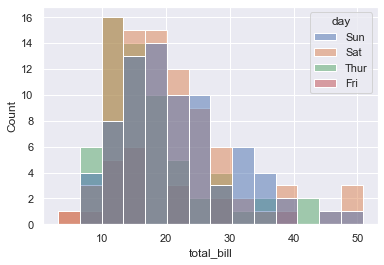

In [84]:
# histogram with hue and stacking and palette


sns.histplot(data = tips, x = 'total_bill',
           hue = 'day')#,
           #multiple = 'stack')
    
# sns.histplot(data = tips, x = 'total_bill',
#            hue = 'day',
#            multiple = 'stack')
tips.head()

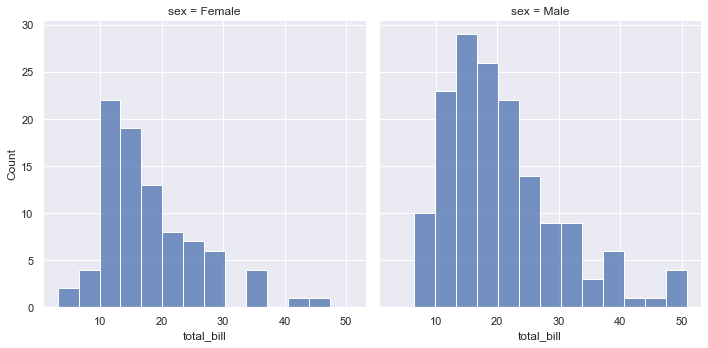

In [89]:
# use 'col' argument with 'sex' to create 'small multiples'

sns.displot(data = tips, x = 'total_bill',
           col = 'sex')

In [ ]:
#histplot will return an axes level object



In [ ]:
# Set kind = 'kde'. kde = probability of finding a observartions at particular value of x. 
# Smooth out version of histogram. Estimating probabilty density function (PDF) in a non-parametric way.



### Categorial Plots

#### Boxplots

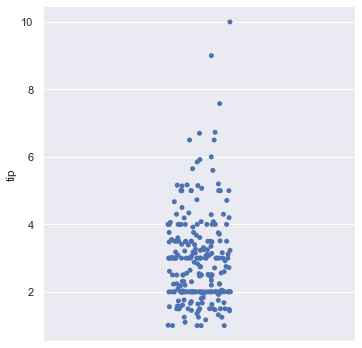

In [87]:
# we can make boxplot with kind = 'box' argument. Returns a figure level object

sns.catplot(data = tips, y = 'tip')

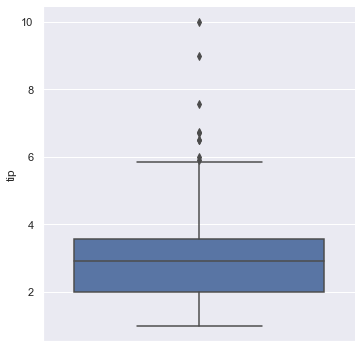

In [88]:
# we can make boxplot with kind = 'box' argument. Returns a figure level object

sns.catplot(data = tips, y = 'tip',
            kind = 'box')

In [86]:
# descriptive statistics for tip

tips.tip.describe()

count    244.000000
mean       2.998279
std        1.383638
min        1.000000
25%        2.000000
50%        2.900000
75%        3.562500
max       10.000000
Name: tip, dtype: float64

<AxesSubplot:>

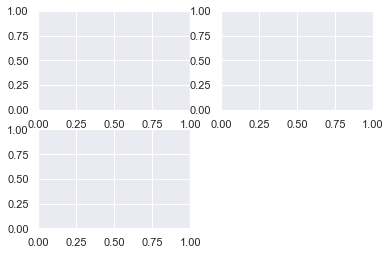

In [90]:
# Create a figure with 4 boxplots
plt.subplot (221)

plt.subplot (222)

plt.subplot (223)


Text(0.5, 0.5, '1.1')

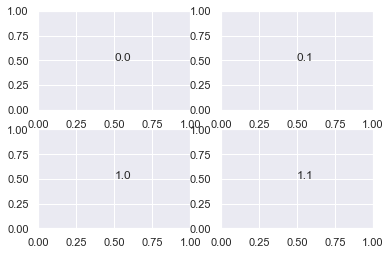

In [97]:
fig, ax = plt.subplots(2,2)#, figsize = (10, 8))

#[row(0-1), col(0-1)]

ax[0,0].text(0.5, 0.5, '0.0')
ax[0,1].text(0.5, 0.5, '0.1')
ax[1,0].text(0.5, 0.5, '1.0')
ax[1,1].text(0.5, 0.5, '1.1')

<AxesSubplot:xlabel='tip', ylabel='time'>

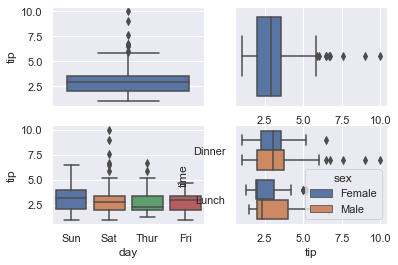

In [106]:
fig, ax = plt.subplots(2,2)

sns.boxplot(data = tips, y = 'tip', ax = ax[0,0])

sns.boxplot(data = tips, x = 'tip', ax = ax[0,1])

sns.boxplot(data = tips, y = 'tip', x = 'day', ax = ax[1,0])

sns.boxplot(data = tips, x = 'tip', y = 'time', ax = ax[1,1], hue = 'sex')

<AxesSubplot:xlabel='sex', ylabel='tip'>

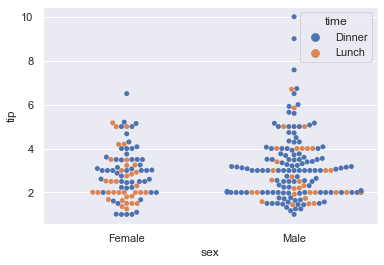

In [109]:
# swarmplot 

sns.swarmplot(data = tips, y = 'tip',
            x = 'sex',
            hue = 'time')

<AxesSubplot:xlabel='sex', ylabel='tip'>

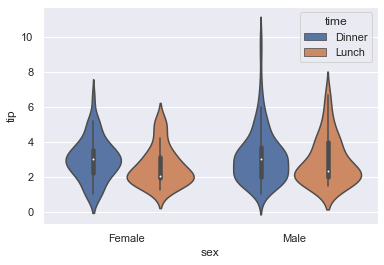

In [112]:
# violin plot

sns.violinplot(data = tips, y = 'tip',
            x = 'sex',
            hue = 'time')

<AxesSubplot:xlabel='sex', ylabel='tip'>

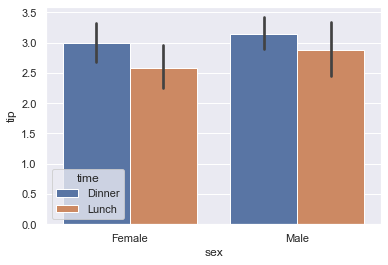

In [113]:
# bar plot 'tip' by gender. Shows mean for each category instead with CI

sns.barplot(data = tips, y = 'tip',
            x = 'sex',
            hue = 'time')

#### Pairplot

In [ ]:
tips.dtypes

   total_bill   tip     sex smoker  day    time  size
1       16.99  1.01  Female     No  Sun  Dinner     2
2       10.34  1.66    Male     No  Sun  Dinner     3


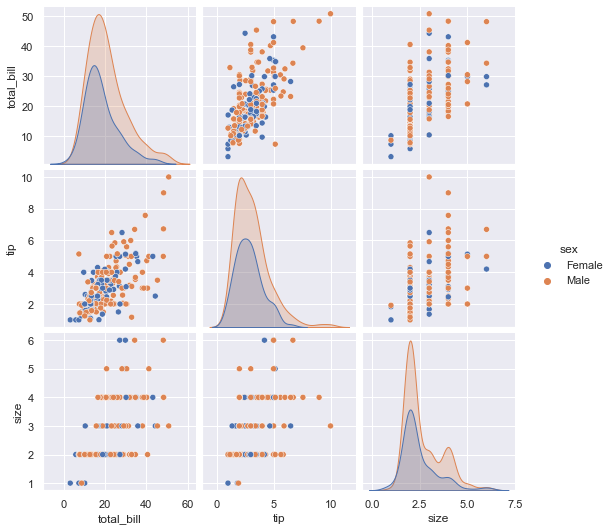

In [121]:
# pairplot for whole dataframe

print(tips.head(2))
sns.pairplot(tips, hue = 'sex')

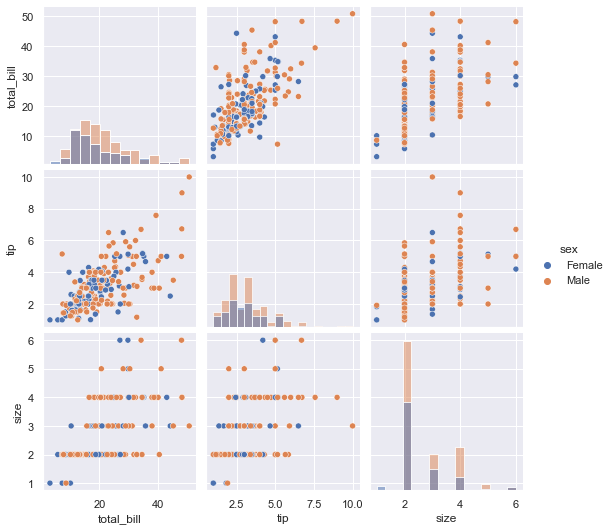

In [126]:
sns.pairplot(tips, diag_kind = 'hist', hue = 'sex')

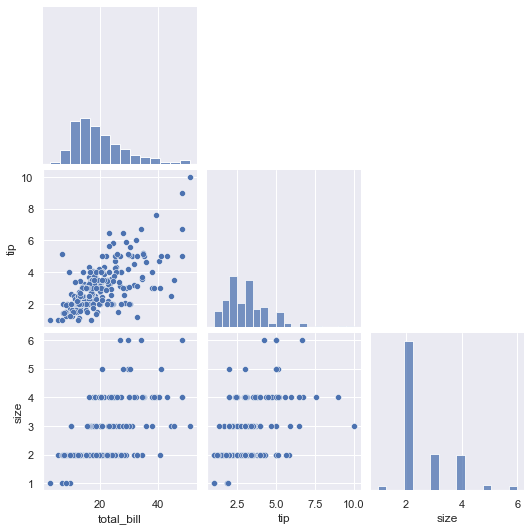

In [114]:
# argument corner = True will not render duplicate plots

sns.pairplot(tips, corner = True)

In [ ]:
# use hue argument to visualize relationship based of different categories



In [ ]:
# use different plot type. 'reg' plot instead of 'scatter'



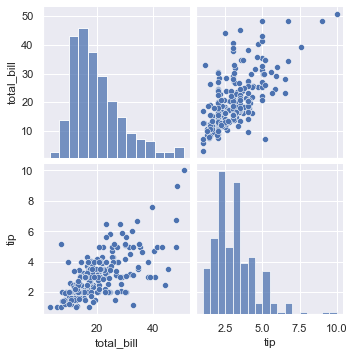

In [127]:
# we can limit the number of variable to plot using vars argument

sns.pairplot(tips, vars = ['total_bill', 'tip'])

#### Jointplot

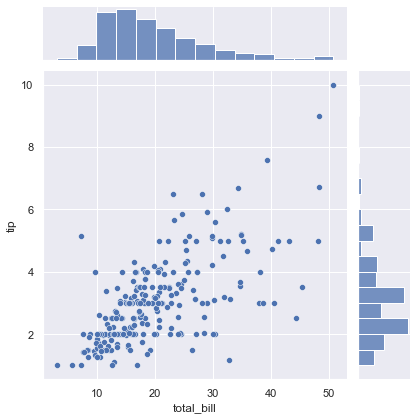

In [129]:
# joint plot total_bill vs tip
    #shows you the marginal distribution

sns.jointplot(data = tips, x = 'total_bill', y = 'tip')

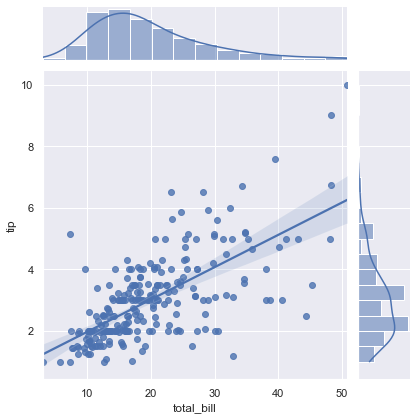

In [130]:
# jointplot with regression line

sns.jointplot(data = tips, x = 'total_bill', y = 'tip', kind = 'reg')

#### Heatmap

In [132]:
#crosstab of time vs smoker
ctab = pd.crosstab(tips.day, tips.smoker)
ctab

smoker,No,Yes
day,,
Fri,4,15
Sat,45,42
Sun,57,19
Thur,45,17


<AxesSubplot:xlabel='smoker', ylabel='day'>

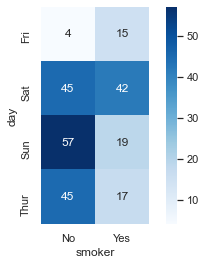

In [133]:
#create a heatmap

sns.heatmap(ctab, cmap = 'Blues', annot = True, square = True)

Seaborn color palettes: https://seaborn.pydata.org/tutorial/color_palettes.html  
Check out this great post too: https://medium.com/@morganjonesartist/color-guide-to-seaborn-palettes-da849406d44f

- SEQUENTIAL: e.g. different shades of same color.  Appropriate when data range from relatively low or uninteresting values to relatively high or interesting values (or vice versa)
- DIVERGING - highlight both low and high values

In [134]:
# Heatmap using mpg dataset

mpg = data('mpg')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


<AxesSubplot:>

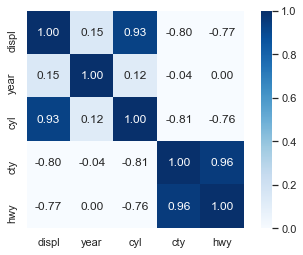

In [143]:
# calculate correlation for numeric variables using panda's .corr() method

mpg.corr()

sns.heatmap(mpg.corr(), cmap = 'Blues', annot = True, square = True,
            #center = True,
            vmax = 1,
            vmin = 0,
            fmt = '.2f') #limits 2 decimal places

In [ ]:
labels = ['Displacement', 'Model Year', 'cylinders', 'City MPG', 'Highway MPG']

In [ ]:
# heatmap for correlation table above

